### references
- https://www.researchgate.net/publication/258797916_Levy_Flights_1f_Noise_and_Self_Organized_Criticality

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

In [2]:
import mistree as mist

In [3]:
import statsmodels.api as sm

/home/AD/tsainbur/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from childes_mi.information_theory import mutual_information as mi
# distances of MI to sample at
distances = np.unique(np.logspace(0, 4, 100, base=10).astype('int'))

In [220]:
#n_repeats = np.random.pareto(1, 100000)#.astype('int')#+1
#n_repeats = np.random.randint(1, 10000, 1000)#.astype('int')#+1
n_repeats = np.random.exponential(scale=100.0, size=10000)
#n_repeats = np.abs(np.random.logseries(0.99, size=1000))
#n_repeats = np.random.zipf(a=2, size=100000)

In [221]:
n_repeats = np.sort(n_repeats)[::-1]

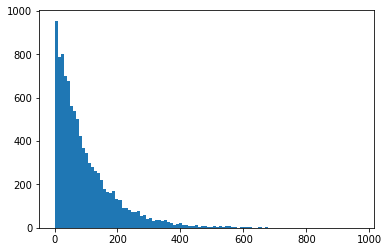

In [222]:
plt.hist(n_repeats, bins=100);

In [223]:
np.sum(n_repeats)

976328.7443943205

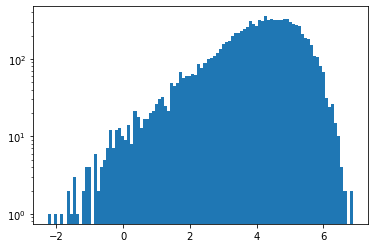

In [224]:
fig, ax = plt.subplots()
ax.hist(np.log(1e-1+n_repeats), bins=100)
#ax.hist(n_repeats, bins=100)
ax.set_yscale("log")

In [225]:
state_1 = [list(np.repeat(True,i)) for i in  tqdm(n_repeats[1::2])]
state_2 =  [list(np.repeat(False,i)) for i in  tqdm(n_repeats[::2])]

In [226]:
def flatten(container):
    for i in container:
        if isinstance(i, (list,tuple)):
            for j in flatten(i):
                yield j
        else:
            yield i

In [227]:
states = list(flatten(list(zip(state_1, state_2))))

In [228]:
len(states), np.sum(states)

(971367, 485461)

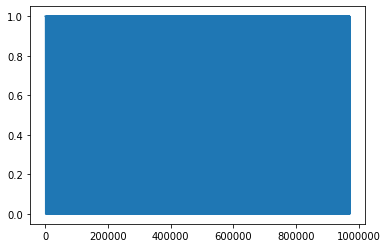

In [229]:
plt.plot(states)

In [230]:
# original model
(MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
    [states], distances=distances, n_jobs=-1
)
MI_DF =  pd.DataFrame(
    [[MI, MI_var, shuff_MI, shuff_MI_var, distances, "no_markov"]],
    columns=["MI", "MI_var", "shuff_MI", "shuff_MI_var", "distances", "shuffle"],
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s


[Parallel(n_jobs=-1)]: Done  38 out of  84 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  55 out of  84 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  72 out of  84 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    0.5s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  38 out of  84 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  55 out of  84 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  72 out of  84 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    0.7s finished


(1, 1000)

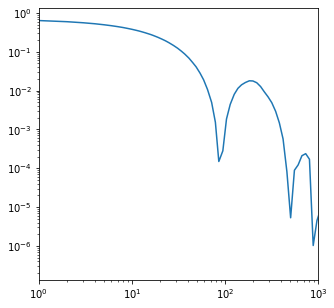

In [231]:
row = MI_DF.iloc[len(MI_DF)-1]
fig, ax = plt.subplots(figsize=(5,5))
MI = row.MI-row.shuff_MI

ax.plot(distances, MI)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([1,1000])

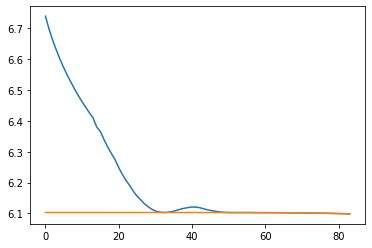

In [232]:
plt.plot(row.MI)
plt.plot(row.shuff_MI)

In [ ]:
plt.plot(n_repeats)